# 机器学习工程师纳米学位

## 模型评价与验证

## 项目 1: 预测波士顿房价




---
## 一. 导入数据
本项目将利用马萨诸塞州波士顿郊区的房屋信息数据训练和测试一个模型，并对模型的性能和预测能力进行测试。通过该数据训练后的好的模型可以被用来对房屋做特定预测---尤其是对房屋的价值。对于房地产经纪等人的日常工作来说，这样的预测模型被证明非常有价值。

此项目的数据集来自[UCI机器学习知识库(数据集已下线)](https://archive.ics.uci.edu/ml/datasets.html)。波士顿房屋这些数据于1978年开始统计，共506个数据点，涵盖了麻省波士顿不同郊区房屋14种特征的信息。。

In [1]:
# 导入此项目需要的库
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sea

%matplotlib inline

In [2]:
# 导入波士顿房屋的数据集
data = pd.read_csv('housing.csv')
print("Boston housing dataset has {} data points with {} variables each.".format(*data.shape))

# 查看数据集
data.head()

Boston housing dataset has 489 data points with 4 variables each.


,RM,LSTAT,PTRATIO,MEDV
0,6.575,4.98,15.3,504000.0
1,6.421,9.14,17.8,453600.0
2,7.185,4.03,17.8,728700.0
3,6.998,2.94,18.7,701400.0
4,7.147,5.33,18.7,760200.0


### 1.1 列名注释

- `'RM'` 是该地区中每个房屋的平均房间数量；
- `'LSTAT'` 是指该地区有多少百分比的业主属于是低收入阶层（有工作但收入微薄）；
- `'PTRATIO'` 是该地区的中学和小学里，学生和老师的数目比（`学生/老师`）；
- `'MEDV'` 是该地区的房屋价值，该值已经过必要的数学转换，可以反映35年来市场的通货膨胀效应；

---
## 二. 分析数据

由于这个项目的最终目标是建立一个预测房屋价值的模型，因此需要将数据集分为**特征(features)**和**目标变量(target variable)**。
- **特征** `'RM'`， `'LSTAT'`，和 `'PTRATIO'`提供了每个数据点的数量相关的信息。
- **目标变量**：` 'MEDV'`，是希望预测的变量。

In [3]:
# 定义特征和目标变量
prices = data['MEDV']
features = data.drop('MEDV', axis = 1)

In [4]:
# 计算prices的最小值、最大值、均值、中值和标准差
minimum_price = np.min(prices)
maximum_price = np.max(prices)
mean_price = np.mean(prices)
median_price = np.median(prices)
std_price = np.std(prices)

# 定义小数点位数
def formater(data):
    return '{:.2f}'.format(data)

# 输出计算的结果
print("Statistics for Boston housing dataset:\n")

statistics = pd.DataFrame({'Minimum price':[minimum_price],
                           'Maximum price':[maximum_price],
                           'Mean price':[mean_price],
                           'Median price':[median_price],
                           'Standard deviation of prices':[std_price]},
                          index = ['Statistics']) 

statistics.applymap(formater)

Statistics for Boston housing dataset:



,Minimum price,Maximum price,Mean price,Median price,Standard deviation of prices
Statistics,105000.00,1024800.00,454342.94,438900.00,165171.13


---
## 三. 模型衡量标准


### 3.1 定义衡量标准
本项目将使用[决定系数](https://en.wikipedia.org/wiki/Coefficient_of_determination) $R^2$ 来量化模型的表现。模型的决定系数是回归分析中十分常用的统计信息，经常被当作衡量模型预测能力好坏的标准。

$R^2$ 的数值范围从0至1，表示**目标变量**的预测值和实际值之间的相关程度平方的百分比。一个模型的 $R^2$ 值为0还不如直接用**平均值**来预测效果好；而一个 $R^2$ 值为1的模型则可以对目标变量进行完美的预测。从0至1之间的数值，则表示该模型中目标变量中有百分之多少能够用**特征**来解释。模型也可能出现负值的 $R^2$，这种情况下模型所做预测有时会比直接计算目标变量的平均值差很多。


In [5]:
# 导入'r2_score'
from sklearn.metrics import r2_score

# 定义得分方程
def performance_metric(y_true, y_predict):
    score = r2_score(y_true, y_predict)
    return score

### 3.2 数据分割与重排

使用 sklearn.model_selection 中的 train_test_split， 将features和prices的数据分成用于训练和测试的数据子集。

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, prices, test_size = 0.2, random_state = 42)

---
## 四. 分析模型的表现
观察使用不同参数，模型在训练集和验证集上的表现。这里使用的特定算法是带剪枝的决策树，选取的算法参数是 `'max_depth'`。用全部训练集训练，选择不同`'max_depth'` 参数，观察这一参数的变化如何影响模型的表现。

### 4.1 学习曲线

/opt/conda/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/learning_curve.py:22: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the functions are moved. This module will be removed in 0.20
  DeprecationWarning)


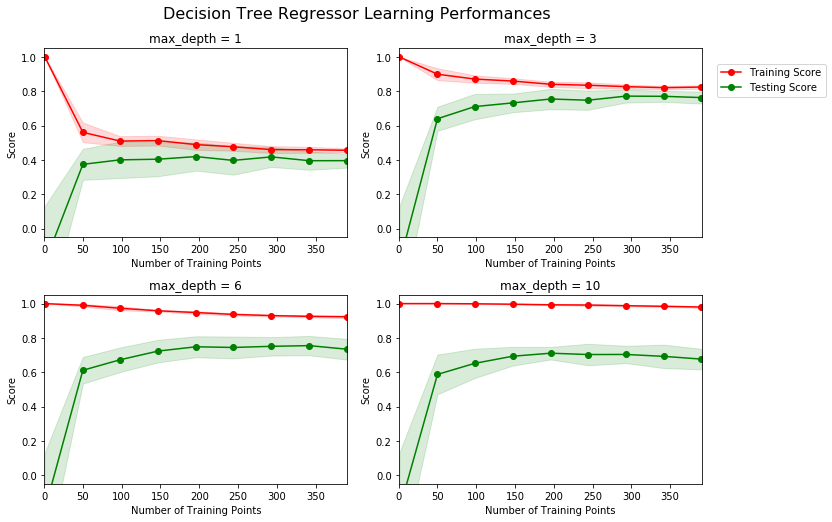

In [7]:
# 输出模型在不同最大深度下的表现
import visuals as vs

vs.ModelLearning(features, prices)

### 4.2 复杂度曲线

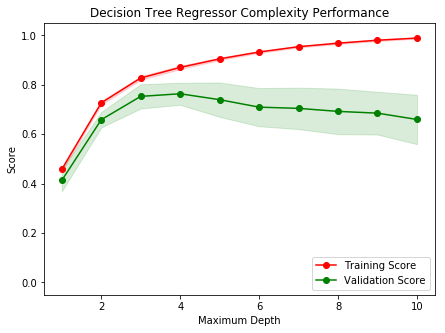

In [8]:
# 输出模型复杂度曲线
vs.ModelComplexity(X_train, y_train)

### 4.3 结论
* 高偏差表示欠拟合（模型过于简单），而高方差表示过拟合（模型过于复杂，以至于无法泛化），可以看到，当模型以最大深度1训练时，模型的预测出现了很大的偏差，因为此时的R2评分最低，模型欠拟合；当模型以最大深度10训练时，模型的预测出现了很大的方差，因为模型对验证集数据过渡敏感，训练集和验证集R2差别很大，属于过拟合。

* 模型最大深度为3时，验证集数据的评分最高，以及训练集评分和验证集评分间的差别较小—即方差较小，模型表现较好。

---
## 五. 模型参数优化
构建一个模型，并使用 `fit_model` 中的优化模型去预测客户特征集。

### 5.1 网格搜索（Grid Search）及交叉验证（Cross-Validation）
 
- 网格搜索法是指首先由用户指定模型中希望优化的所有参数，并给出相应的参数列表和参数值，之后由程序使用穷举法，将各个参数取值进行排列组合，列出所有的组合生成“网格”，利用交叉验证的方式对各参数组合进行评分，依据评分方式和实际得分选取最佳参数组合，从而优化模型。  


- K折交叉验证法（k-fold cross-validation）在数据集上划分训练集和测试集，对模型验证时, 将训练集分成k个子集，每个子集均做一次验证集，其余的作为第二阶段训练集。交叉验证重复k次，每次选择一个子集作为验证集，并将k次的平均交叉验证识别率作为结果。


- GridSearchCV对每一个参数组合进行一次 K 折交叉验证，并计算各次验证的平均分，最后依据评分方式和实际得分，确定模型的最佳参数组合。网格搜索如果不使用交叉验证，可以缩短训练时间，但可能无法得到最优的参数组合。交叉验证对各参数组合得出的评分更为可靠，可以保障得到最优化的参数组合。

### 5.2 拟合模型
使用**决策树算法**训练一个模型，并使用网格搜索找到最佳的模型参数。

In [9]:
# 导入 'ShuffleSplit', 'make_scorer', 'DecisionTreeRegressor' 以及 'GridSearchCV'
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV

def fit_model(X, y):
    """ 拟合一个决策树模型，并使用网格搜索优化模型参数 """
    
    # 定义交叉验证集
    cv_sets = cross_validator = KFold(10)
    
    # 定义决策树模型
    regressor = DecisionTreeRegressor()

    # 定义需要优化的参数列表
    params = {'max_depth':[1,3,5,7,9],'min_samples_leaf':[2,4,6,8,10], 'min_samples_split':[2,4,6,8,10]}

    # 定义评分标准（r2_score）
    scoring_fnc = make_scorer(performance_metric)

    # 得到网格搜索对象
    grid_obj = GridSearchCV(regressor, params, scoring=scoring_fnc, cv=cv_sets)

    # 使用网格搜索对象拟合数据
    grid = grid_obj.fit(X, y)

    # 得到最优分类器
    return grid.best_estimator_

### 5.3 最优模型

将决策树回归函数代入训练数据的集合，得到最优化的模型。

In [10]:
# 训练分类器
best_clf = fit_model(X_train, y_train)

# 输出最优化参数
print("Parameter 'max_depth' is {} for the optimal model.".format(best_clf.get_params()['max_depth']))
print("Parameter 'min_samples_leaf' is {} for the optimal model.".format(best_clf.get_params()['min_samples_leaf']))
print("Parameter 'min_samples_split' is {} for the optimal model.".format(best_clf.get_params()['min_samples_split']))

Parameter 'max_depth' is 5 for the optimal model.
Parameter 'min_samples_leaf' is 8 for the optimal model.
Parameter 'min_samples_split' is 2 for the optimal model.


## 六. 做出预测
当我们用数据训练出一个模型，它现在就可用于对新的数据进行预测。在决策树回归函数中，模型已经学会对新输入的数据*提问*，并返回对**目标变量**的预测值。你可以用这个预测来获取数据未知目标变量的信息，这些数据必须是不包含在训练数据之内的。

### 6.1 模型得分
使用最优模型在整个测试数据上进行预测, 并计算相对于目标变量的决定系数 $R^2$ 的值。


In [11]:
# 在测试集上预测并计算r2
y_predict = best_clf.predict(X_test)
r2 = performance_metric(y_test, y_predict)

print("Optimal model has R^2 score {:,.2f} on test data".format(r2))

Optimal model has R^2 score 0.84 on test data


* R2分数为0.84，最优模型预测能力满足要求。

### 6.2 预测房价
使用此模型以帮助你的客户评估他们想出售的房屋。以下是希望评估房屋价值的三个客户的资讯：

| 特征 | 客戶 1 | 客戶 2 | 客戶 3 |
| :---: | :---: | :---: | :---: |
| 房屋内房间总数 | 5 间房间 | 4 间房间 | 8 间房间 |
| 社区贫困指数（％被认为是贫困阶层） | 17% | 32% | 3% |
| 邻近学校的学生-老师比例 | 15：1 | 22：1 | 12：1 |

In [12]:
# 客户数据矩阵
client_data = [[5, 17, 15], # Client 1
               [4, 32, 22], # Client 2
               [8, 3, 12]]  # Client 3

# 输出预测值
for i, price in enumerate(best_clf.predict(client_data)):
    print("Predicted selling price for Client {}'s home: ${:,.2f}".format(i+1, price))

Predicted selling price for Client 1's home: $403,025.00
Predicted selling price for Client 2's home: $227,733.33
Predicted selling price for Client 3's home: $921,900.00


### 6.3 预测结果分析

* 从房屋特征的数值判断，客户3的社区贫困指数在数据集中处于最低水平，房间数量最多，所以该客户的房屋预测价格应该最高，客户1次之，客户2在数据集中房间数量最少，且社区贫困指数最高，所以预测房价应该最低；从波士顿房屋数据集的统计结果来看，三个客户房屋的预测价格均位于统计数据的最大和最小值之间。综上，模型的预测价格与房屋特征值相符，并且处于合理的数值范围，预测合理。

### 6.4 模型健壮性

一个最优的模型不一定是一个健壮模型。有的时候模型会过于复杂或者过于简单，以致于难以泛化新增添的数据；有的时候模型采用的学习算法并不适用于特定的数据结构；有的时候样本本身可能有太多噪点或样本过少，使得模型无法准确地预测目标变量。这些情况下我们说模型是欠拟合的。

采用不同的训练和测试集执行 `fit_model` 函数10次，观察预测价值的浮动范围，以反映模型是否足够健壮。

In [13]:
vs.PredictTrials(features, prices, fit_model, client_data)

Trial 1: $413,933.33
Trial 2: $431,792.31
Trial 3: $430,942.11
Trial 4: $464,100.00
Trial 5: $389,025.00
Trial 6: $407,137.50
Trial 7: $418,687.50
Trial 8: $421,968.75
Trial 9: $387,300.00
Trial 10: $388,200.00

Range in prices: $76,800.00


### 6.5 实用性探讨
*如果将建构的模型应用在现实世界中，会有哪些缺陷？* 

* 1978年所采集的数据虽然已经考虑了通货膨胀，但是因为特征数据不仅受到通胀单一因素影响，还会受到政策法规变化乃至国际形势变迁等众多因素的影响，因此在今天未必适用；
* 数据中呈现的特征数目较少，如果要准确预测房价，可能还需要房屋装修情况，房龄，社区教育质量等等特征；
* 在波士顿这样的大都市采集的数据训练的模型未必适合应用在其它乡镇地区，因为乡镇地区和大都市的居住环境，政策法规等存在较大差异，两者在特征数据上可能存在较大差异；